Model Training
--------------

Here we:

+ Define the model in keras
+ Train the model on the synthetic data
+ Test on unseen data and assess quality of the result uning a confusion matrix

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, BatchNormalization, AveragePooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.models import load_model

from sklearn.metrics import confusion_matrix

Model define as described in Wu et. al. (2018), except for:

+ 20 output layers for the different result schema
+ No batch normaliasation.  Batch normalisation has no effect on the output and increases runtime 

In [3]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, padding='same', strides=1, input_shape=(48, 32, 1)))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=16, kernel_size=3, padding='same', strides=1))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=2))


model.add(Conv2D(filters=32, kernel_size=3, padding='same', strides=1))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', strides=1))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=1))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=1))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(21, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training data organisation

In [7]:
training_data = np.load('training_data/training_data.npy')

test = []

for i in range(250000):
    
    a = training_data[:,:,i]
    
    b = np.reshape(a,(48,32,1))
    
    test.append(b)
    
training_data = np.stack(test, axis=0)

print('Training data shape:' + str(training_data.shape))


training_labels = np.load('training_data/training_labels.npy')
training_labels_cat = to_categorical(training_labels)

print('Training labels shape:' + str(training_labels_cat.shape))

Training data shape:(250000, 48, 32, 1)
Training labels shape:(250000, 21)


Training, validation and test data subsets

In [1]:
training_datac = training_data[:250000:100,:,:,:]
training_labels_cat_c = training_labels_cat[:250000:100,:]

val_datac = training_data[:250000:230,:,:,:]
val_labels_cat_c = training_labels_cat[:250000:230,:]

test_data = training_data[:250000:333,:,:,:]
test_label = training_labels_cat[:250000:333,:]

Fit/save model or load a fitted model

In [7]:
#Fit and save model
#model.fit(training_datac, training_labels_cat_c, validation_data=(val_datac, val_labels_cat_c), epochs=50, verbose=1, batch_size=32)
#model.save('faultCNNmodel.h5')

#Load model
model = load_model('faultCNNmodel.h5')

Run prediction on the test data and check quality using a confusion matrix

In [9]:
prediction = model.predict(test_data, verbose=1)

751/751 [==============================] - 0s 511us/step


In [10]:
def result_vector(array):

    def decode(datum):
        return np.argmax(datum)

    res = []
    for i in range(array.shape[0]):
        datum = array[i]
        decoded_datum = decode(array[i])
        res.append(decoded_datum)

    return res

result = result_vector(prediction)
testlabel = result_vector(test_label)

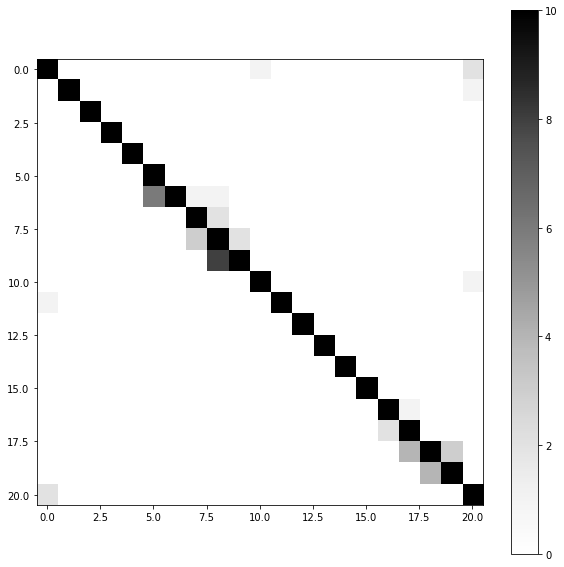

In [17]:
confusion = confusion_matrix(testlabel, result)

plt.figure(figsize=(10,10))
plt.imshow(confusion, cmap='Greys', vmin=0, vmax=10)
plt.colorbar()